In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import model
import glob 
import scipy 

In [2]:
N = 300
dt = 0.0001
T = 10
w_in = 50 * 10**-12

fs = np.linspace(0.1,5,5)

    

In [3]:
f1 = fs[0]
spikes1 = model.run(N,f1,dt,T,w_in)

  2%|▏         | 2176/99999 [01:57<1:28:20, 18.46it/s]


KeyboardInterrupt: 

In [ ]:
f2 = fs[1]
spikes2 = model.run(N,f2,dt,T,w_in)

In [ ]:
f3 = fs[2]
spikes3 = model.run(N,f3,dt,T,w_in)

In [ ]:
f4 = fs[3]
spikes4 = model.run(N,f4,dt,T,w_in)

In [ ]:
f5 = fs[4]
spikes5 = model.run(N,f5,dt,T,w_in)

  0%|          | 118/99999 [00:05<1:30:33, 18.38it/s]

# Load datas

In [43]:
w_in_list =[]
fs_list = []
for add in glob.glob("./data0/*.pt"):
    if add.split("_")[3] == "50.0.pt":
        fs_list.append(add)
    else:
        w_in_list.append(add)


In [44]:
N_values = [i for i in range(300,1100,100)]
Ns = [[],[],[],[],[],[],[],[]]
for add in glob.glob("./data/*.pt"):
    Ns[N_values.index(int(add.split("_")[0].split("/")[2]))].append(add)

In [115]:
spikes = torch.load(Ns[-1][0]).type(torch.float64)
spikes


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.float64)

num spikes :  tensor(1247471., dtype=torch.float64)


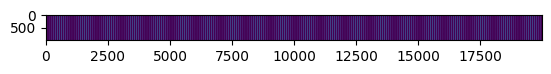

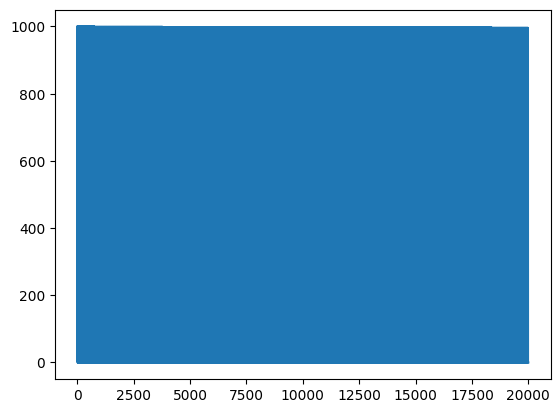

tensor(62.3736, dtype=torch.float64)
nan


/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/alireza-astane/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [122]:


print("num spikes : ", torch.sum(spikes).cpu())
time_steps = spikes.shape[1]

plt.imshow(spikes[:,:].cpu())
plt.show()
plt.plot(torch.arange(time_steps)[:],spikes.sum(0)[:].cpu())
plt.show()
print(spikes.sum(0).mean().cpu())



avalanch = spikes.sum(0) != 0
slippingR = avalanch.roll(+1)
slippingL = avalanch.roll(-1)
slippingR[0] = False
slippingL[-1] = False

ends  = torch.logical_xor( avalanch ,(avalanch *slippingL))
starts  = torch.logical_xor( avalanch ,(avalanch *slippingR))

spikes_sum = torch.cumsum(spikes.sum(dim = 0),dim = 0)

avalanches_size = spikes_sum[torch.where(ends)[0]] - spikes_sum[torch.where(starts)[0]] + 1

nbins = 20
bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))
# bins = 50
freq,size = np.histogram(avalanches_size.cpu(),bins = bins)
size = (size[:-1] + size[1:])/2

slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
print(slope)



In [134]:
avalanches_steps.max()

tensor(1, device='cuda:0')

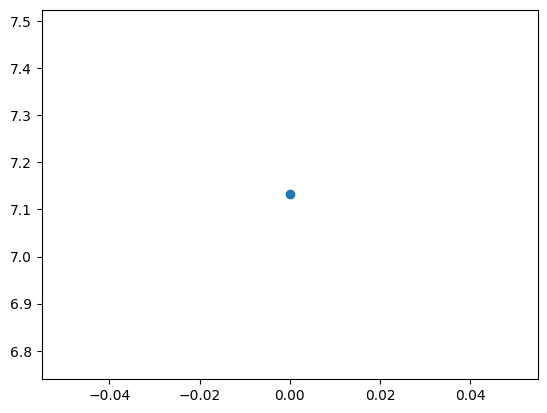

In [124]:


plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
# plt.text(6,4,f"slope = {np.round(slope,3)}")
plt.show()






nan


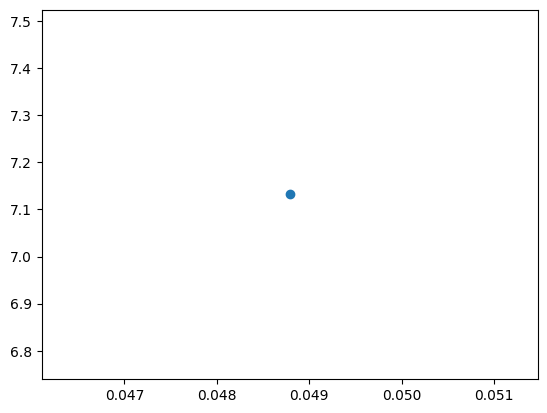

In [120]:

avalanches_steps = torch.where(ends) [0] -   torch.where(starts)[0] + 1


# nbins = 10
# bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))
bins = 50
freq,size = np.histogram(avalanches_steps.cpu(),bins = 10)
size = (size[:-1] + size[1:])/2


slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
print(slope)


plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
# plt.text(6,4,f"slope = {np.round(slope,3)}")
plt.show()

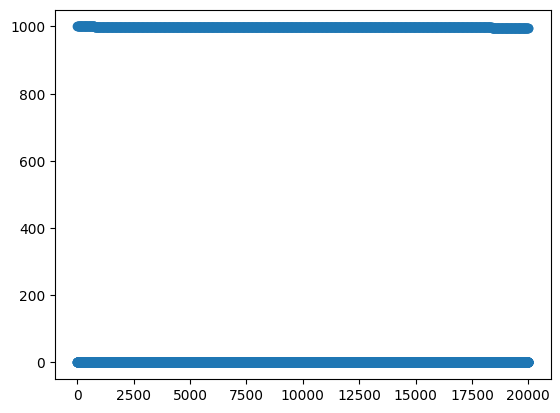

In [139]:

plt.scatter(np.arange(spikes.sum(0).shape[0]),spikes.sum(0).cpu())